# Comprehensive Comparision

We do a comparative study and analysis of the following Machine Learning models-
- Fisher Linear Discriminant
- Linear Perceptron
- Naive Bayes
- Logistic Regression
- Artificial Neural Networks and,
- Support Vector Machines 

The models are imported from the sklearn libraries. The data is scaled using the preprocessing sklearn library, StandardScaler and a 7-fold cross validation is done for each model using the sklearn in built method cross_validate.

In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

## Loading Data

In [388]:
df = pd.read_csv('dataset_comb.csv')
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen


In [389]:
df['Class'].value_counts()

jasmine    9985
Gonen      8200
Name: Class, dtype: int64

In [390]:
df.values.shape

(18185, 12)

In [391]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [392]:
df = shuffle(df)
X = df.values[:,1:-1]
Y = df.values[:,-1]

In [393]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [394]:
average= {}
maxm= {}

## Fisher Linear Discriminant 

The Fisher Linear Discriminant Analysis is a classification technique that identifies the linear combination of features that characterizes or separates two or more classes. 
The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.

We import the sklearn LinearDiscrminantAnalysis model.

In [395]:
#pipe = Pipeline([('scaler', MinMaxScaler()), ('fda', LinearDiscriminantAnalysis())]) #scaling not required
fda_scores = cross_validate(LinearDiscriminantAnalysis(),X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(fda_scores['test_score'],fda_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

average['Fisher Discriminant']= np.average(fda_scores['test_score'])
maxm['Fisher Discriminant']=np.amax(fda_scores['test_score'])
print("\nAverage test accuracy= ",average['Fisher Discriminant'],"\n")

fda_prec = cross_validate(LinearDiscriminantAnalysis(),X,Y,cv=7,scoring='precision')
for i,score in enumerate(fda_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
fda_rec = cross_validate(LinearDiscriminantAnalysis(),X,Y,cv=7,scoring='recall')
for i,score in enumerate(fda_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.9842186297151655  Training Accuracy =  0.9872329505357028
Fold  2
Testing Accuracy =  0.9876828329484219  Training Accuracy =  0.9866555462885738
Fold  3
Testing Accuracy =  0.9907621247113164  Training Accuracy =  0.9861422980689035
Fold  4
Testing Accuracy =  0.9857582755966128  Training Accuracy =  0.986912170398409
Fold  5
Testing Accuracy =  0.985373364126251  Training Accuracy =  0.9871046384807852
Fold  6
Testing Accuracy =  0.9865280985373364  Training Accuracy =  0.986912170398409
Fold  7
Testing Accuracy =  0.986907970735464  Training Accuracy =  0.9865922504490634

Average test accuracy=  0.9867473280529383 

Precision over fold  1  =  0.9766001376462491
Precision over fold  2  =  0.9793672627235214
Precision over fold  3  =  0.986130374479889
Precision over fold  4  =  0.9779917469050894
Precision over fold  5  =  0.979296066252588
Precision over fold  6  =  0.9806629834254144
Precision over fold  7  =  0.9793388429752066


Recall over fold  1 

## Linear Perceptron 

A Perceptron is a linear classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. It uses the Gradient Descent Algorithm to update the weights based on misclassified points on each iteration.

We import the sklearn Perceptron model.

In [396]:
pipeLP = Pipeline([('scaler', StandardScaler()), ('per', Perceptron())])  #or use MinMaxScaler
per_scores = cross_validate(pipeLP,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(per_scores['test_score'],per_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

average['Perceptron']=np.average(per_scores['test_score'])
maxm['Perceptron']=np.amax(per_scores['test_score'])
print("\nAverage test accuracy= ",average['Perceptron'],"\n")

per_prec = cross_validate(pipeLP,X,Y,cv=7,scoring='precision')
for i,score in enumerate(per_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
per_rec = cross_validate(pipeLP,X,Y,cv=7,scoring='recall')
for i,score in enumerate(per_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.9846035411855273  Training Accuracy =  0.9851158016295631
Fold  2
Testing Accuracy =  0.9896073903002309  Training Accuracy =  0.9874254186180792
Fold  3
Testing Accuracy =  0.9911470361816782  Training Accuracy =  0.9846025534098929
Fold  4
Testing Accuracy =  0.9803695150115473  Training Accuracy =  0.9820363123115416
Fold  5
Testing Accuracy =  0.9842186297151655  Training Accuracy =  0.9849874895746455
Fold  6
Testing Accuracy =  0.9407236335642802  Training Accuracy =  0.9423878873420157
Fold  7
Testing Accuracy =  0.9811320754716981  Training Accuracy =  0.9849884526558892

Average test accuracy=  0.9788288316328754 

Precision over fold  1  =  0.9779310344827586
Precision over fold  2  =  0.9915671117357695
Precision over fold  3  =  0.9902166317260657
Precision over fold  4  =  0.9764542936288089
Precision over fold  5  =  0.9766162310866575
Precision over fold  6  =  0.9930286599535244
Precision over fold  7  =  0.9771309771309772


Recall over fo

## Naive Bayes 

Naive Bayes algorithms are a set of supervised statistical classification machine learning algorithms based on the Bayes probability theorem.

Bayes theorem states that:

$$P(A|B) = \frac{P(B/A) * P(A)}{P(B)}$$$$P(A|B) = \frac{P(B/A) * P(A)}{P(B/A) * P(A) + P(C/A) * P(A)}$$
An important assumption made by Bayes theorem is that the value of a particular feature is independent from the value of any other feature for a given the class.

We import the sklearn GaussianNB model.

In [418]:
pipeNB = Pipeline([('scaler', StandardScaler()), ('nb', GaussianNB())]) #scaling not required i think
nb_scores = cross_validate(pipeNB,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(nb_scores['test_score'],nb_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

average['Naive Bayes']=np.average(nb_scores['test_score'])
maxm['Naive Bayes']=np.amax(nb_scores['test_score'])
print("\nAverage test accuracy= ",average['Naive Bayes'],"\n")

nb_prec = cross_validate(pipeNB,X,Y,cv=7,scoring='precision')
for i,score in enumerate(nb_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
nb_rec = cross_validate(pipeNB,X,Y,cv=7,scoring='recall')
for i,score in enumerate(nb_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.9803695150115473  Training Accuracy =  0.9840893051902226
Fold  2
Testing Accuracy =  0.9842186297151655  Training Accuracy =  0.9836402129980112
Fold  3
Testing Accuracy =  0.9896073903002309  Training Accuracy =  0.9827420286135883
Fold  4
Testing Accuracy =  0.9830638953040801  Training Accuracy =  0.9838968371078463
Fold  5
Testing Accuracy =  0.9838337182448037  Training Accuracy =  0.9838326810803875
Fold  6
Testing Accuracy =  0.9838337182448037  Training Accuracy =  0.9836402129980112
Fold  7
Testing Accuracy =  0.9811320754716981  Training Accuracy =  0.9837695663330768

Average test accuracy=  0.9837227060417614 

Precision over fold  1  =  0.9692832764505119
Precision over fold  2  =  0.9726962457337884
Precision over fold  3  =  0.9820813232253618
Precision over fold  4  =  0.973305954825462
Precision over fold  5  =  0.973990417522245
Precision over fold  6  =  0.9733424470266575
Precision over fold  7  =  0.9680489462950373


Recall over fold

## Logistic Regression 

Logistic regression is a machine learning algorithm for classification. In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.

We import the sklearn LogisticRegression model.

In [398]:
pipeLR = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(solver='liblinear'))])
lr_scores = cross_validate(pipeLR,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(lr_scores['test_score'],lr_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

average['Logistic Regression']=np.average(lr_scores['test_score'])
maxm['Logistic Regression']=np.amax(lr_scores['test_score'])
print("\nAverage test accuracy= ",average['Logistic Regression'],"\n")

lr_prec = cross_validate(pipeLR,X,Y,cv=7,scoring='precision')
for i,score in enumerate(lr_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
lr_rec = cross_validate(pipeLR,X,Y,cv=7,scoring='recall')
for i,score in enumerate(lr_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.9880677444187836  Training Accuracy =  0.9890934753320074
Fold  2
Testing Accuracy =  0.99153194765204  Training Accuracy =  0.9887726951947136
Fold  3
Testing Accuracy =  0.9923017705927637  Training Accuracy =  0.9887726951947136
Fold  4
Testing Accuracy =  0.9880677444187836  Training Accuracy =  0.9894142554693014
Fold  5
Testing Accuracy =  0.9876828329484219  Training Accuracy =  0.9894784114967601
Fold  6
Testing Accuracy =  0.9880677444187836  Training Accuracy =  0.9894784114967601
Fold  7
Testing Accuracy =  0.9884482094724683  Training Accuracy =  0.9897356941236849

Average test accuracy=  0.9891668562745777 

Precision over fold  1  =  0.9840388619014573
Precision over fold  2  =  0.9888579387186629
Precision over fold  3  =  0.9916083916083916
Precision over fold  4  =  0.9847222222222223
Precision over fold  5  =  0.9881035689293212
Precision over fold  6  =  0.9894810659186536
Precision over fold  7  =  0.9867503486750349


Recall over fold

## Artificial Neural Network 

Artificial neural network is a machine learning technique used for classification problems. ANN is a set of connected input output network in which weight is associated with each connection. It consists of one input layer, one or more intermediate layer and one output layer.
A Multi Layer Perceptron is a supervised learning technique with a feed forward artificial neural network through back-propagation that can classify non-linearly separable data.

We import the sklearn MLPClassifier model.

In [412]:
pipeNN = Pipeline([('scaler', StandardScaler()), ('ann', MLPClassifier())])
nn_scores = cross_validate(pipeNN,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(nn_scores['test_score'],nn_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

average['Neural Network']=np.average(nn_scores['test_score'])
maxm['Neural Network']=np.amax(nn_scores['test_score'])
print("\nAverage test accuracy= ",np.average(nn_scores['test_score']),"\n")

nn_prec = cross_validate(pipeNN,X,Y,cv=7,scoring='precision')
for i,score in enumerate(nn_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
nn_rec = cross_validate(pipeNN,X,Y,cv=7,scoring='recall')
for i,score in enumerate(nn_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.9880677444187836  Training Accuracy =  0.9903124398537243
Fold  2
Testing Accuracy =  0.9911470361816782  Training Accuracy =  0.9903124398537243
Fold  3
Testing Accuracy =  0.993841416474211  Training Accuracy =  0.9902482838262655
Fold  4
Testing Accuracy =  0.9880677444187836  Training Accuracy =  0.9907615320459358
Fold  5
Testing Accuracy =  0.9884526558891455  Training Accuracy =  0.990954000128312
Fold  6
Testing Accuracy =  0.9884526558891455  Training Accuracy =  0.9913389362930647
Fold  7
Testing Accuracy =  0.9892183288409704  Training Accuracy =  0.9903772132409546

Average test accuracy=  0.989606797444674 

Precision over fold  1  =  0.9853963838664812
Precision over fold  2  =  0.9888579387186629
Precision over fold  3  =  0.9930118798043326
Precision over fold  4  =  0.9854166666666667
Precision over fold  5  =  0.9888190076869322
Precision over fold  6  =  0.9887876664330764
Precision over fold  7  =  0.9874913134120917


Recall over fold 

## Support Vector Machine 

Support vector machines (SVMs) are a set of supervised learning methods used for classification. They are effective for high dimensional spaces and cases where the number of dimensions is greater than the number of samples.

We import the sklearn svm.SVC model.

In [400]:
pipesvm = Pipeline([('scaler', StandardScaler()), ('svm', SVC(kernel='rbf'))])  #kernel can linear or rbf or...  rbf gives highest acc
svm_scores = cross_validate(pipesvm,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(svm_scores['test_score'],svm_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)
    
average['SVM']=np.average(svm_scores['test_score'])
maxm['SVM']=np.amax(svm_scores['test_score'])
print("\nAverage test accuracy= ",average['SVM'],"\n")

svm_prec = cross_validate(pipesvm,X,Y,cv=7,scoring='precision')
for i,score in enumerate(svm_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
svm_rec = cross_validate(pipesvm,X,Y,cv=7,scoring='recall')
for i,score in enumerate(svm_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.9892224788298691  Training Accuracy =  0.990376595881183
Fold  2
Testing Accuracy =  0.99153194765204  Training Accuracy =  0.9901199717713479
Fold  3
Testing Accuracy =  0.9946112394149346  Training Accuracy =  0.9900558157438891
Fold  4
Testing Accuracy =  0.9884526558891455  Training Accuracy =  0.9907615320459358
Fold  5
Testing Accuracy =  0.9888375673595073  Training Accuracy =  0.9907615320459358
Fold  6
Testing Accuracy =  0.9888375673595073  Training Accuracy =  0.990954000128312
Fold  7
Testing Accuracy =  0.9892183288409704  Training Accuracy =  0.9906338208878624

Average test accuracy=  0.9901016836208534 

Precision over fold  1  =  0.9860917941585535
Precision over fold  2  =  0.9888579387186629
Precision over fold  3  =  0.9937062937062937
Precision over fold  4  =  0.985406532314107
Precision over fold  5  =  0.9888111888111888
Precision over fold  6  =  0.9881284916201117
Precision over fold  7  =  0.9854166666666667


Recall over fold  1

## Boxplots of Testing Accuracies

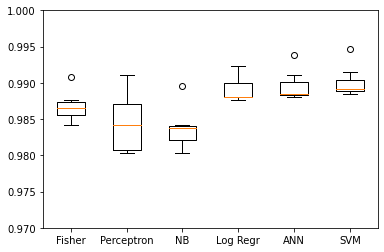

In [413]:
fig, ax = plot.subplots()
ax.boxplot([fda_scores['test_score'],per_scores['test_score'],nb_scores['test_score'],lr_scores['test_score'],nn_scores['test_score'],svm_scores['test_score']])
ax.set_xticklabels(['Fisher','Perceptron','NB','Log Regr','ANN','SVM'])
plot.ylim([0.97,1.0])
plot.show()


## Boxplots of Training Accuracies 

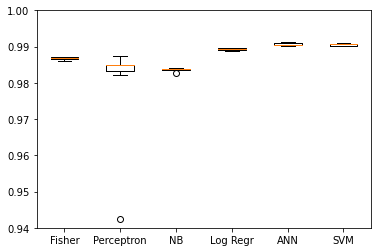

In [414]:
fig, ax = plot.subplots()
ax.boxplot([fda_scores['train_score'],per_scores['train_score'],nb_scores['train_score'],lr_scores['train_score'],nn_scores['train_score'],svm_scores['train_score']])
ax.set_xticklabels(['Fisher','Perceptron','NB','Log Regr','ANN','SVM'])
plot.ylim([0.94,1.0])
plot.show()

## Conclusions 

The average test accuracy over the 7 folds for each classification model shows SVM having the highest accuracy, and Linear Perceptron having the least. 

In [415]:
df2 = pd.DataFrame(list(average.items()),columns = ['Model','Average Testing Accuracy']) 
df2

,Model,Average Testing Accuracy
0,Fisher Discriminant,0.986747
1,Perceptron,0.978829
2,Naive Bayes,0.983723
3,Logistic Regression,0.989167
4,Neural Network,0.989607
5,SVM,0.990102


The maximum test accuracy obtained in a fold for each classification model shows SVM having the highest accuracy, and Naive Bayes having the least.

In [416]:
df2 = pd.DataFrame(list(maxm.items()),columns = ['Model','Maximum Testing Accuracy']) 
df2

,Model,Maximum Testing Accuracy
0,Fisher Discriminant,0.990762
1,Perceptron,0.991147
2,Naive Bayes,0.989607
3,Logistic Regression,0.992302
4,Neural Network,0.993841
5,SVM,0.994611


- The boxplots of the training accuracies show that ANN and SVM perform the best while training the datasets, while NB performs the worst.
- Linear Perceptron has the highest variance as shown by its boxplot. This could be due to the fact it makes random predictions of the weights while training.

- The boxplots of the testing accuracies shows SVM having the highest accuracy with a maximum accuracy of almost 0.995. The ANN model is second with Logistic Regression being the third best.
- Linear Perceptron has the lowest accuracy, 0.978, among these models. This could be due to the dataset not being perfectly linearly separable.
